# **System_Recommendation: Movie Recommendation**

**Nama:** Muhammad Rofi'ul Arham

Project DBS Foundation x Dicoding

## Data Understanding

Dalam proyek ini, dataset yang digunakan adalah [Movie Recommendation](https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data). Dataset ini terdiri dari 4 file CSV. Berikut adalah rincian dari dataset tersebut:

- Links: berisi daftar tautan eksternal untuk setiap film.
- Movies: berisi daftar film yang tersedia.
- Ratings: berisi penilaian pengguna terhadap film.
- Tags: berisi kata kunci atau label yang terkait dengan film.

In [1]:
import pandas as pd

# Import semua file csv
links = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/links.csv')
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/tags.csv')

# Menampilkan jumlah data setiap dataset
print('Jumlah data link movie : ', len(links.movieId.unique()))
print('Jumlah data movie : ', len(movies.movieId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.userId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.movieId.unique()))
print('Jumlah data : ', len(tags.movieId.unique()))

Jumlah data link movie :  9742
Jumlah data movie :  9742
Jumlah data ratings dari user :  610
Jumlah data ratings dari user :  9724
Jumlah data :  1572


## Univariate Exploratory Data Analysis

Tahap penting untuk memahami kondisi awal data sebelum preprocessing.
Kita akan mengecek missing values, struktur data, dan kualitas data
pada setiap dataset untuk menentukan strategi pembersihan data.

In [2]:
print("1. INFORMASI DATASET LINKS:")
print("Dataset links berisi ID eksternal untuk setiap film (IMDb, TMDb)")
print(links.info())

print("Missing values dalam dataset links:")
print(links.isnull().sum())

1. INFORMASI DATASET LINKS:
Dataset links berisi ID eksternal untuk setiap film (IMDb, TMDb)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
Missing values dalam dataset links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [3]:
print("2. INFORMASI DATASET MOVIES:")
print("Dataset movies berisi judul film dan genre")
print(movies.info())

print("Missing values dalam dataset movies:")
print(movies.isnull().sum())

2. INFORMASI DATASET MOVIES:
Dataset movies berisi judul film dan genre
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
Missing values dalam dataset movies:
movieId    0
title      0
genres     0
dtype: int64


In [4]:
print("3. INFORMASI DATASET RATINGS:")
print("Dataset ratings berisi penilaian user terhadap film (1-5 skala)")
print(ratings.info())

print("Missing values dalam dataset ratings:")
print(ratings.isnull().sum())

print("Statistik deskriptif rating:")
print(ratings.describe())


3. INFORMASI DATASET RATINGS:
Dataset ratings berisi penilaian user terhadap film (1-5 skala)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Missing values dalam dataset ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Statistik deskriptif rating:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    119

In [4]:
print("4. INFORMASI DATASET TAGS:")
print("Dataset tags berisi kata kunci yang diberikan user untuk film")
print(tags.info())

print("Missing values dalam dataset tags:")
print(tags.isnull().sum())

4. INFORMASI DATASET TAGS:
Dataset tags berisi kata kunci yang diberikan user untuk film
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None
Missing values dalam dataset tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


Berdasarkan analisis di atas, ditemukan:
1. Dataset 'links' memiliki missing values pada kolom 'tmdbId' - perlu penanganan khusus
2. Dataset 'movies', 'ratings', dan 'tags' tidak memiliki missing values
4. Rating berdistribusi normal dengan rata-rata 3.5 dari skala 1-5

Terdapat missing values pada dataset links, tapi tidak akan mempengaruhi model karena kita tidak menggunakan tmdbId dalam sistem rekomendasi.

## Data Preprocessing

Pada tahap ini, kita akan menggabungkan dan membersihkan data dari berbagai  dataset untuk mempersiapkan data yang siap digunakan dalam modeling. Proses ini meliputi penggabungan dataset, penanganan missing values, dan standardisasi format data.

In [5]:
import numpy as np

# Menggabungkan seluruh movieID pada kategori movie
movie_all = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh data movie berdasarkan movieID: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieID:  9742


In [6]:
# Menggabungkan seluruh userId
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),

))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


In [8]:
movie_info = pd.concat([links, movies, ratings, tags])
movie = pd.merge(ratings, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,1.0,4.0,9.649827e+08,NaN
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,5.0,4.0,8.474350e+08,NaN
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,7.0,4.5,1.106636e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6359580,610,170875,3.0,1493846415,4630562.0,337339.0,NaN,NaN,NaN,NaN,NaN,NaN
6359581,610,170875,3.0,1493846415,NaN,NaN,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN,NaN
6359582,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,50.0,1.0,1.514498e+09,NaN
6359583,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,249.0,3.0,1.505165e+09,NaN


In [9]:
movie.isnull().sum()

,0
userId_x,0
movieId,0
rating_x,0
timestamp_x,0
imdbId,6258749
tmdbId,6258762
title,6258749
genres,6258749
userId_y,201672
rating_y,434885


In [10]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
movieId,,,,,,,,,,,
1,14498880,185460.0,53441180205380,24662435.0,185330.0,Toy Story (1995)Toy Story (1995)Toy Story (199...,Adventure|Animation|Children|Comedy|FantasyAdv...,14465415.0,181245.0,5.304394e+13,pixarpixarfunpixarpixarfunpixarpixarfunpixarpi...
2,4205116,43790.0,14492875665352,12484670.0,972840.0,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,Adventure|Children|FantasyAdventure|Children|F...,4060210.0,41525.0,1.437287e+13,fantasymagic board gameRobin Williamsgamefanta...
3,825832,9492.0,2926881125616,5887856.0,811304.0,Grumpier Old Men (1995)Grumpier Old Men (1995)...,Comedy|RomanceComedy|RomanceComedy|RomanceCome...,796900.0,8814.0,2.836734e+12,moldyoldmoldyoldmoldyoldmoldyoldmoldyoldmoldyo...
4,13851,148.5,56610468432,804195.0,219499.0,Waiting to Exhale (1995)Waiting to Exhale (199...,Comedy|Drama|RomanceComedy|Drama|RomanceComedy...,10773.0,115.5,4.403036e+10,0
5,777987,7976.5,2577949287482,5539009.0,581238.0,Father of the Bride Part II (1995)Father of th...,ComedyComedyComedyComedyComedyComedyComedyCome...,765723.0,7374.5,2.494850e+12,pregnancyremakepregnancyremakepregnancyremakep...
...,...,...,...,...,...,...,...,...,...,...,...
193581,552,12.0,4611327246,5476944.0,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,0
193583,552,10.5,4611328635,5914996.0,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,0
193585,552,10.5,4611329415,6397426.0,479308.0,Flint (2017),Drama,184.0,3.5,1.537110e+09,0


In [11]:
# Menggabungkan Data dengan Fitur Nama Movie

# Definisikan dataframe rating ke dalam variabel all_movie_rate
all_movie_rate = ratings
all_movie_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [12]:
all_movie_name = pd.merge(all_movie_rate, movies[['movieId','title','genres']], on='movieId', how='left')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [13]:
# Menggabungkan dataframe genres dengan all_movie_name dan memasukkannya ke dalam variabel all_movie
all_movie = pd.merge(all_movie_name, tags[['movieId','tag']], on='movieId', how='left')
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


## Data Preparation

Tahap persiapan data ini fokus pada pembersihan data final, penanganan
missing values, dan pembuatan struktur data yang optimal untuk kedua
model rekomendasi (Content-Based dan Collaborative Filtering).

In [14]:
# Mengatasi missing value
all_movie.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,52549


In [16]:
# Menghapus rows dengan missing values untuk memastikan kualitas data
all_movie_clean = all_movie.dropna()

print("Jumlah data setelah pembersihan:", len(all_movie_clean))

Jumlah data setelah pembersihan: 233213


In [17]:
# Verifikasi kembali agar tidak ada missing values tersisa
print(all_movie_clean.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64


In [19]:
# Mengurutkan data berdasarkan movieId
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)

print('Jumlah film unik setelah pembersihan:', len(fix_movie.movieId.unique()))

Jumlah film unik setelah pembersihan: 1554


In [20]:
# Menghapus duplikat untuk Content-Based Filtering
preparation = fix_movie.drop_duplicates('movieId')

print("Jumlah film unik untuk Content-Based:", len(preparation))

Jumlah film unik untuk Content-Based: 1554


In [22]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()

print(f"Jumlah film ID: {len(movie_id)}")
print(f"Jumlah nama film: {len(movie_name)}")
print(f"Jumlah genre film: {len(movie_genre)}")

Jumlah film ID: 1554
Jumlah nama film: 1554
Jumlah genre film: 1554


In [23]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_data = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_data

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


# Model Development dengan Content Based Filtering

Bagian ini mengembangkan model Content-Based Filtering menggunakan TF-IDF Vectorizer dan Cosine Similarity. Model ini merekomendasikan film berdasarkan kemiripan genre dengan film yang disukai user.

Content-Based Filtering merekomendasikan film berdasarkan kemiripan  karakteristik (genre) dengan film yang disukai user sebelumnya. Metode ini menggunakan TF-IDF untuk menganalisis genre dan Cosine Similarity untuk menghitung kemiripan antar film.

In [24]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(movie_data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [25]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(movie_data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1554, 24)

In [26]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

In [27]:
# Membuat DataFrame untuk melihat matriks TF-IDF
# Kolom diisi dengan fitur (kata-kata) hasil ekstraksi dari TF-IDF
# Baris diisi dengan judul film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movie_data.movie_name
).sample(22, axis=1).sample(10, axis=0)

,crime,drama,noir,listed,children,musical,film,adventure,mystery,animation,...,no,sci,romance,comedy,action,horror,western,fantasy,thriller,imax
movie_name,,,,,,,,,,,,,,,,,,,,,
Mad Max: Fury Road (2015),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.439606,0.000000,0.0,...,0.0,0.483798,0.000000,0.000000,0.427180,0.0,0.0,0.000000,0.395151,0.0
Black Orpheus (Orfeu Negro) (1959),0.000000,0.531842,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.846843,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
The Devil's Advocate (1997),0.000000,0.339161,0.0,0.0,0.0,0.0,0.0,0.000000,0.745376,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.573920,0.0
Angie (1994),0.000000,0.433964,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.690993,0.578103,0.000000,0.0,0.0,0.000000,0.000000,0.0
"Vanishing, The (1993)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.792340,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.610080,0.0
What's Eating Gilbert Grape (1993),0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
Clear and Present Danger (1994),0.581372,0.303016,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.554318,0.0,0.0,0.000000,0.512757,0.0
"Big Lebowski, The (1998)",0.821415,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.570331,0.000000,0.0,0.0,0.000000,0.000000,0.0
"Santa Clause, The (1994)",0.000000,0.356376,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.474745,0.000000,0.0,0.0,0.804744,0.000000,0.0


## Cosine Similarity

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

In [29]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_data['movie_name'], columns=movie_data['movie_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,"Two Days, One Night (Deux jours, une nuit) (2014)","With a Friend Like Harry... (Harry, un ami qui vous veut du bien) (2000)","Blue Angel, The (Blaue Engel, Der) (1930)",8MM (1999),Akira (1988)
movie_name,,,,,
Millions (2004),0.239889,0.122046,0.239889,0.081361,0.000000
"Red Badge of Courage, The (1951)",0.366404,0.186411,0.366404,0.124270,0.000000
How to Make an American Quilt (1995),0.531842,0.270580,0.531842,0.180380,0.000000
"Seventh Seal, The (Sjunde inseglet, Det) (1957)",1.000000,0.508759,1.000000,0.339161,0.000000
"Astronaut's Wife, The (1999)",0.000000,0.349544,0.000000,0.233021,0.443474
Air Force One (1997),0.000000,0.584601,0.000000,0.389721,0.289128
Dark Water (Honogurai mizu no soko kara) (2002),0.261574,0.514142,0.261574,0.771239,0.000000
High and Low (Tengoku to jigoku) (1963),0.195205,0.383688,0.195205,0.255783,0.000000
Song of the Little Road (Pather Panchali) (1955),1.000000,0.508759,1.000000,0.339161,0.000000


## Mendapatkan Rekomendasi

membuat fungsi movie_recommendations dengan beberapa parameter sebagai berikut:

- Nama_movie : Nama judul dari movie (index kemiripan dataframe).
- Similarity_data : Dataframe mengenai similarity yang telah kita didefinisikan sebelumnya
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘movie_name’ dan ‘genre’.
- k : Banyak rekomendasi yang ingin diberikan.

In [30]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_data[['movie_name', 'genre']], k=5):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [31]:
movie_data[movie_data.movie_name.eq('John Wick (2014)')]

,id,movie_name,genre
1491,115149,John Wick (2014),Action|Thriller


dari hasil di atas dapat dilihat bahwa pengguna menyukai movie yang berjudul John Wick (2014) yang bergenre Action dan Thriller.
Kemudian kita coba untuk mendapatkan rekomendasi movie yang mirip dengan John Wick (2014).

In [32]:
# Mendapatkan rekomendasi film (movie) yang mirip dengan John Wick (2014)
movie_recommendations('John Wick (2014)')

,movie_name,genre
0,"Siege, The (1998)",Action|Thriller
1,In the Line of Fire (1993),Action|Thriller
2,Air Force One (1997),Action|Thriller
3,Kill Bill: Vol. 2 (2004),Action|Drama|Thriller
4,Natural Born Killers (1994),Action|Crime|Thriller


## Evaluation

Evaluasi kuantitatif untuk Content-Based Filtering menggunakan Precision@K dan evaluasi kualitas rekomendasi berdasarkan relevansi genre. Evaluasi ini penting untuk mengukur performa model.

In [33]:
def evaluate_content_based_precision(test_movies, k=5, similarity_threshold=0.1):
    """
    Menghitung Precision@K untuk Content-Based Filtering

    Parameters:
    - test_movies: List film untuk ditest
    - k: Jumlah rekomendasi (K)
    - similarity_threshold: Threshold minimum untuk dianggap relevan

    Returns:
    - Average Precision@K
    """
    precisions = []

    for movie in test_movies:
        if movie in cosine_sim_df.index:
            # Dapatkan rekomendasi
            recommendations = movie_recommendations(movie, k=k)

            if len(recommendations) > 0:
                # Hitung relevansi berdasarkan genre similarity
                original_genre = movie_data[movie_data.movie_name == movie]['genre'].iloc[0]
                original_genres = set(original_genre.lower().split('|'))

                relevant_count = 0
                for _, rec_movie in recommendations.iterrows():
                    rec_genres = set(rec_movie['genre'].lower().split('|'))
                    # Hitung intersection genre
                    common_genres = len(original_genres.intersection(rec_genres))
                    total_genres = len(original_genres.union(rec_genres))

                    # Relevan jika ada overlap genre yang signifikan
                    if common_genres / total_genres >= similarity_threshold:
                        relevant_count += 1

                precision = relevant_count / k
                precisions.append(precision)

    return np.mean(precisions) if precisions else 0

In [34]:
# Test dengan sample film dari berbagai genre
print("\n=== EVALUASI PRECISION@K ===")
print("Menguji Precision@5 dengan sample film dari berbagai genre...")

test_movies_sample = [
    'John Wick (2014)',
    'Toy Story (1995)',
    'Forrest Gump (1994)',
    'The Matrix (1999)',
    'Titanic (1997)'
]


=== EVALUASI PRECISION@K ===
Menguji Precision@5 dengan sample film dari berbagai genre...


In [35]:
# Filter film yang ada dalam dataset
available_test_movies = [movie for movie in test_movies_sample if movie in movie_data.movie_name.values]
print(f"Film test yang tersedia: {len(available_test_movies)} dari {len(test_movies_sample)}")

if available_test_movies:
    precision_at_5 = evaluate_content_based_precision(available_test_movies, k=5, similarity_threshold=0.2)

    print(f"\n=== HASIL EVALUASI CONTENT-BASED FILTERING ===")
    print(f"Precision@5: {precision_at_5:.4f}")
    print(f"Persentase: {precision_at_5*100:.2f}%")

    print(f"\nInterpretasi:")
    if precision_at_5 >= 0.8:
        print("Excellent: Model memberikan rekomendasi yang sangat relevan")
    elif precision_at_5 >= 0.6:
        print("Good: Model memberikan rekomendasi yang cukup relevan")
    elif precision_at_5 >= 0.4:
        print("Fair: Model memberikan rekomendasi dengan relevansi sedang")
    else:
        print("Poor: Model perlu improvement untuk meningkatkan relevansi")

    print(f"\nMetrik Precision@K mengukur proporsi rekomendasi yang relevan")
    print(f"dari total K rekomendasi yang diberikan. Nilai 1.0 berarti semua")
    print(f"rekomendasi relevan, sedangkan 0.0 berarti tidak ada yang relevan.")


Film test yang tersedia: 4 dari 5

=== HASIL EVALUASI CONTENT-BASED FILTERING ===
Precision@5: 1.0000
Persentase: 100.00%

Interpretasi:
Excellent: Model memberikan rekomendasi yang sangat relevan

Metrik Precision@K mengukur proporsi rekomendasi yang relevan
dari total K rekomendasi yang diberikan. Nilai 1.0 berarti semua
rekomendasi relevan, sedangkan 0.0 berarti tidak ada yang relevan.


# Model Development dengan Collaborative Filtering

## Data Understanding

In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [37]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Data Preparation

In [38]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [39]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [40]:
# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)

# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

In [41]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
df['ratings'] = df['rating'].values.astype(np.float32)

# Nilai minimun rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


## Membagi Data untuk Training dan Validasi

In [42]:
# Mengacak data untuk menghindari bias
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


In [43]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values

# Membuat variabel y untuk membuat ratings dari hasil
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


## Proses Training

Membuat model Neural Network untuk Collaborative Filtering. Menggunakan embedding layers untuk user dan movie, serta bias terms untuk memprediksi rating yang akan diberikan user pada suatu film.

In [44]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid


In [45]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [46]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 104s 10ms/step - loss: 0.6470 - root_mean_squared_error: 0.2424 - val_loss: 0.6126 - val_root_mean_squared_error: 0.2060
Epoch 2/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 134s 9ms/step - loss: 0.6049 - root_mean_squared_error: 0.1992 - val_loss: 0.6087 - val_root_mean_squared_error: 0.2016
Epoch 3/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 151s 10ms/step - loss: 0.5998 - root_mean_squared_error: 0.1931 - val_loss: 0.6077 - val_root_mean_squared_error: 0.2002
Epoch 4/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 135s 9ms/step - loss: 0.5965 - root_mean_squared_error: 0.1882 - val_loss: 0.6071 - val_root_mean_squared_error: 0.1994
Epoch 5/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 98s 10ms/step - loss: 0.5948 - root_mean_squared_error: 0.1871 - val_loss: 0.6077 - val_root_mean_squared_error: 0.1998
Epoch 6/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 137s 9ms/step - loss: 0.5959 - root_mean_squared_error: 0.1868 - val_loss: 0.6067 - val_root_mean_squared_error: 0.1987
Epoch 7/20
100

## Visualisasi Metrik

Visualisasi metrik training untuk menganalisis performa model
selama proses training. Grafik menunjukkan tren RMSE pada
training dan validation set.

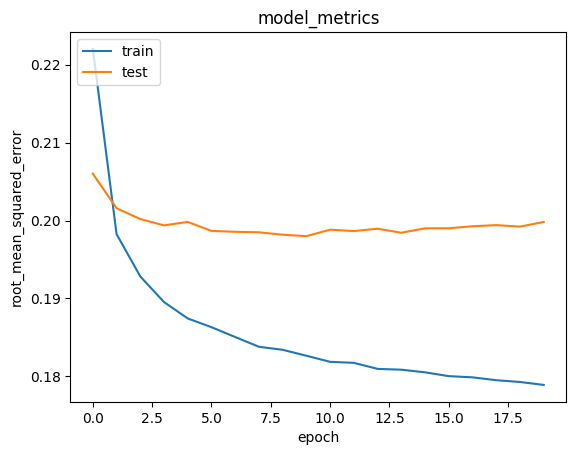

In [47]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan rekomendasi film (movie)

In [50]:
# Menyalin data movie_data ke dalam variabel movie_df
movie_df = movie_data

# Membaca file ratings.csv yang berisi data rating pengguna terhadap film
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/ratings.csv')

# Mengambil secara acak satu userId dari data rating
user_id = df.userId.sample(1).iloc[0]

# Mengambil semua film yang telah ditonton oleh user tersebut
movie_watched_by_user = df[df.userId == user_id]

# Menentukan daftar ID film yang belum ditonton oleh user tersebut
movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']

# Menyaring hanya film yang ada dalam dictionary movie_to_movie_encoded
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

# Mengubah ID film yang belum ditonton ke bentuk encoded (numerik)
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]

# Mengubah user ID menjadi bentuk encoded (numerik)
user_encoder = user_to_user_encoded.get(user_id)

# Membuat array gabungan berisi pasangan (user_encoded, movie_encoded)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [51]:
# Memprediksi rating yang mungkin diberikan user terhadap film yang belum ditonton
ratings = model.predict(user_movie_array).flatten()

# Mengambil indeks dari 10 prediksi rating tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Mengubah indeks encoded film ke ID film asli berdasarkan prediksi terbaik
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

# Menampilkan rekomendasi untuk user tertentu
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)

# Menampilkan film dengan rating tertinggi yang sudah pernah ditonton user
print('movie with high ratings from user')
print('----' * 8)

# Mengambil 5 film dengan rating tertinggi yang pernah ditonton user tersebut
top_movie_user = (
    movie_watched_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

# Menampilkan nama dan genre dari 5 film favorit user
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)

# Menampilkan 10 rekomendasi film berdasarkan hasil prediksi model
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Showing recommendations for users: 586
movie with high ratings from user
--------------------------------
Braveheart (1995) : Action|Drama|War
Shawshank Redemption, The (1994) : Crime|Drama
Matrix, The (1999) : Action|Sci-Fi|Thriller
Galaxy Quest (1999) : Adventure|Comedy|Sci-Fi
Gladiator (2000) : Action|Adventure|Drama
--------------------------------
Top 10 movie recommendation
--------------------------------
Wallace & Gromit: The Best of Aardman Animation (1996) : Adventure|Animation|Comedy
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) : Comedy|War
Streetcar Named Desire, A (1951) : Drama
Paths of Glory (1957) : Drama|War
Sweet Hereafter, The (1997) : Drama
Lifeboat (1944) : Drama|War
Man Bites Dog (C'est arrivé près de chez vous) (1992) : Comedy|Crime|Drama|Thriller
Guess Who's Coming to Dinner (1967) : Drama
Son of Rambow (2007) : Children|Comedy|Drama
Captain Fantastic (2016) : Drama
